# Housekeeping

In [70]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Variables and Data Gathering

In [144]:
Ticker = 'NKE'
fast = 5
slow = 30
Lookback = 365


def get_data():
    df = yf.download(Ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-Lookback:,:]

def add_moving_average(df, fast, slow): 
    df[f'{fast}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(slow).mean()
    return df.dropna()


# Creating and Testing Strategy

In [145]:
def add_strategy(df, fast, slow):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], -1, 1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df


def test_strategy(df, Ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    
    subset = df.iloc[-Lookback:, :]

    plt.figure(figsize=(10, 6))
    plt.plot(subset['Close'], label='Close Price')
    plt.plot(subset[f'{fast}_ma'], label=f'{fast}-Day MA')
    plt.plot(subset[f'{slow}_ma'], label=f'{slow}-Day MA')
    plt.title(f'{Ticker} Price and Moving Averages')
    plt.axhline(0, color='black', linewidth=1, linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(subset['Asset_Returns'], label=f'{Ticker} Cumulative Returns')
    plt.plot(subset['Strategy_Returns'], label=f'{fast}-{slow} Crossover Strategy Returns')
    plt.legend()
    plt.title(f'{fast}-{slow} Moving Average Crossover Returns')
    plt.axhline(0, color='black', linewidth=1, linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.grid(True)
    plt.show()


    return df.dropna()
    
def return_summary(df, ticker, window):
    asset_return = df['Asset_Returns'].iloc[-1] * 100
    strategy_return = df['Strategy_Returns'].iloc[-1] * 100
    print(f"{ticker} Buy & Hold Return: {asset_return:.2f}%")
    print(f"{window}-Day MA Strategy Return: {strategy_return:.2f}%")

# Visualising and Summarising Returns

C:\Users\EWD\AppData\Local\Temp\ipykernel_10884\3374434120.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker)
[*********************100%***********************]  1 of 1 completed


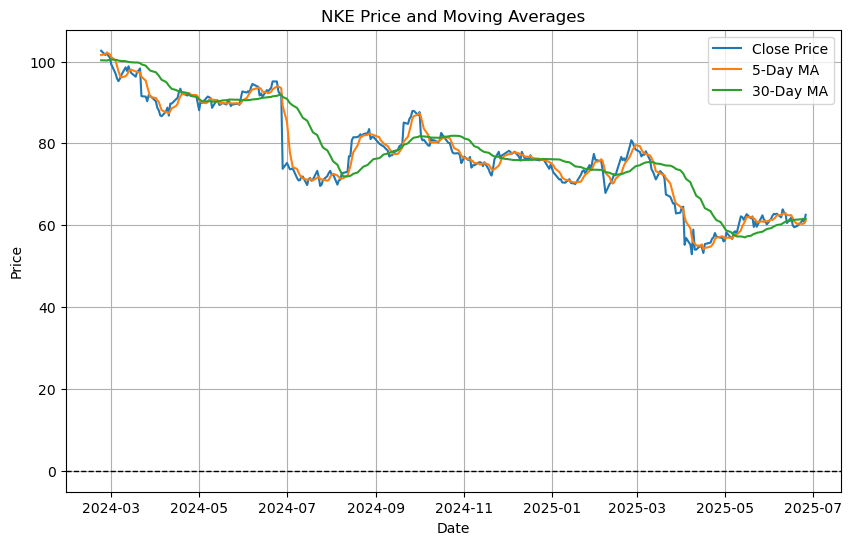

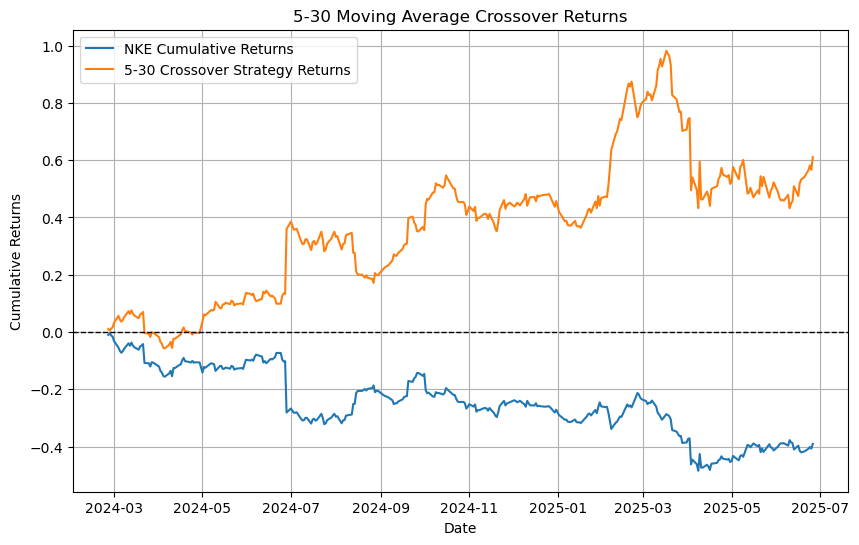

NKE Buy & Hold Return: -39.07%
30-Day MA Strategy Return: 61.06%


In [146]:
df = get_data()
df = add_moving_average(df, fast, slow)
df = add_strategy(df, fast, slow)
df = test_strategy(df, Ticker, fast, slow)
return_summary(df, Ticker, slow)